In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Force and energy

In [14]:
def ho_energy_force(r, k=1, r0=0):
    energy = 0.5 * k*(r-r0)**2
    force = -k * (r-r0)

    return energy, force

In [65]:
def plot_energy_force(some_function, x_min=-5, x_max=5, range=0.1, **kwargs):
    x_points = np.arange(x_min, x_max + range, range)
    e, f = some_function(x_points, **kwargs)
  
    y_label = 'U(x)'
    for arg in kwargs:
        y_label = y_label + ', %s=%s' %(arg, str(kwargs[arg]))
    plot = plt.plot(x_points, e, label=y_label)
    plt.plot(x_points, f, color=plot[0].get_color(), linestyle = '--')
    plt.legend(loc=0)
    

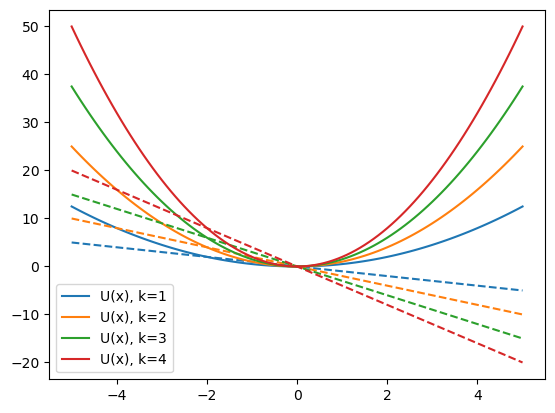

In [70]:
plot_energy_force(ho_energy_force, k=1)
plot_energy_force(ho_energy_force, k=2)
plot_energy_force(ho_energy_force, k=3)
plot_energy_force(ho_energy_force, k=4)


### 1-D harmonic Oscillator

In [84]:
def ho_r_v(t, A=1, omega=1, phi=0):
    r = A*np.cos(omega*t + phi)
    v = -A*omega* np.sin(omega*t + phi)

    return r, v

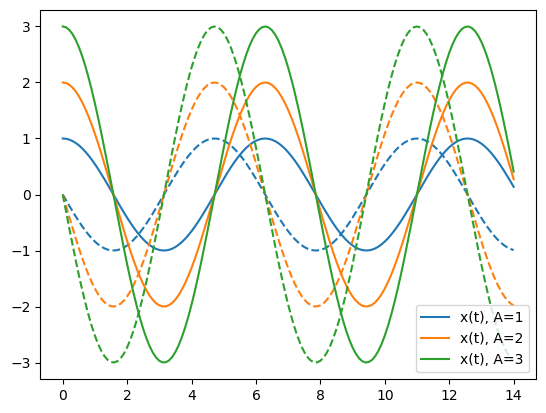

In [93]:
def plot_oscillator(t_min=0, t_max=14, dt=0.1, **kwargs):
    t_points = np.arange(t_min, t_max + dt, dt)

    r, v = ho_r_v(t_points, **kwargs)
   
    y_label = 'x(t)'
    for arg in kwargs:
        y_label = y_label + ', %s=%s' %(arg, str(kwargs[arg]))
    plot = plt.plot(t_points, r, label=y_label)
    plt.plot(t_points, v, color=plot[0].get_color(), linestyle = '--')
    plt.legend(loc=0)
    

plot_oscillator(A=1)
plot_oscillator(A=2)
plot_oscillator(A=3)

### Velocity verlet Algorithm

In [94]:
def r_change(r, v, F, dt, m=1):
    dr = r + dt*v + 0.5*m*dt*dt*F

    return dr


def v_change(v, dt, F, dF, m=1):
    dv = v + 0.5*dt*m*(F+dF)

    return dv

In [99]:
def velocity_verlet_ho(initial_r, initial_v, max_t, dt, t=0, frequency=3, **kwargs):
    r = initial_r
    v = initial_v
    positions = []
    velocities = []
    total_energies = []
    save_times = []

    step_number = 0

    while (t < max_t):
        potential, force = ho_energy_force(r, **kwargs)

        if step_number % frequency == 0:
            total_energy = 0.5*v**2 + potential
            positions.append(r)
            velocities.append(v)
            total_energies.append(total_energy)
            save_times.append(t)
        r = r_change(r, v, force, dt)  # updating to the new positions
        # new position comes with new energy and force
        potential2, force2 = ho_energy_force(r, **kwargs)
        v = v_change(v=v, F=force, dF=force2, dt=dt)

        t= t+dt
        step_number += 1

    return save_times, positions, velocities, total_energies


##### initial values

In [108]:
k=2.3
max_time=20
initial_energy=5
initial_position = np.sqrt(2*initial_energy/k)
initial_velocity = 0
omega = np.sqrt(k)
dt = (2*np.pi/omega)/100


In [100]:
times, positions, velocities, total_energies = velocity_verlet_ho(
    initial_r=initial_position, initial_v=initial_velocity, max_t=max_time,  dt=dt, k=k)

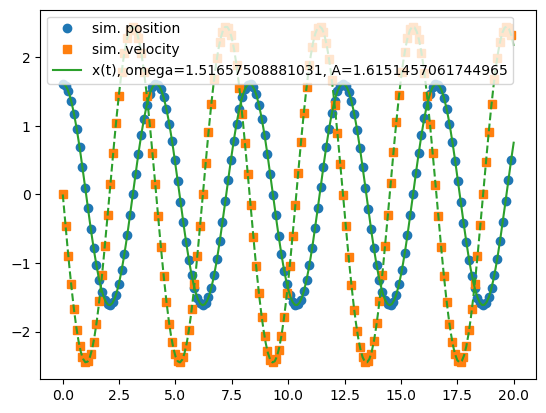

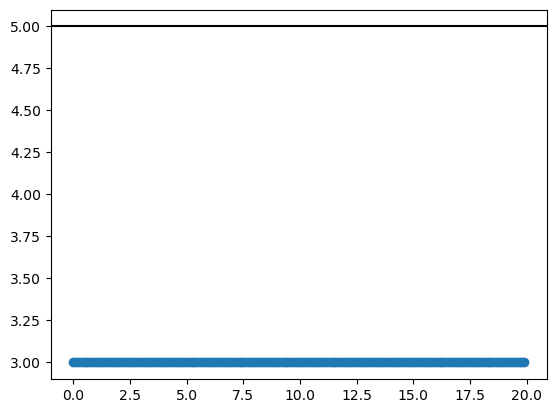

In [120]:
A = np.sqrt((1.2*initial_energy)/k)

plt.plot(times,positions,marker='o',label='sim. position',linestyle='')
plt.plot(times,velocities,marker='s',label='sim. velocity',linestyle='')
plot_oscillator(t_max=max_time,omega=omega, A=A)


plt.figure()
plt.plot(times,total_energies,marker='o',linestyle='',label='Simulated E')
plt.axhline(initial_energy,color='black',label='Exact')
# plt.ylim(0.95*initial_energy,1.05*initial_energy)
